<a href="https://colab.research.google.com/github/13thptr/Colabs/blob/main/exploitation_trajectoire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
#import decimal #insuffisant
import mpmath as mp

In [ ]:
"""Ancien jeu de valeurs
t = [ 2.57006, 2.64, 2.75475, 2.8, 2.84, 2.88, 2.92, 2.96, 3, 3.04, 3.08, 3.12, 3.16, 3.2, 3.24, 3.28, 3.32, 3.36, 3.4, 3.44, 3.48, 3.52, 3.56, 3.6, 3.64, 3.68, 3.72, 3.76, 3.8, 3.84, 3.88, 3.92, 3.96, 4, 4.04, 4.08, 4.12, 4.16]

x = [-0.0073, 0.292, 0.7154, 1.0074, 1.1315, 1.2775, 1.4089, 1.5622, 1.8396, 1.9929, 2.1389, 2.263, 2.4236, 2.7083, 2.8689, 3.0149, 3.1463, 3.3069, 3.6208, 3.7522, 3.8982, 4.0442, 4.2194, 4.5114, 4.6793, 4.8472, 5.0005, 5.1538, 5.4677, 5.621, 5.8108, 5.9641, 6.1393, 6.4824, 6.6503, 6.8401, 7.008, 7.1321]

y = [0, 0.3577, 0.876, 1.1899, 1.3067, 1.4454, 1.5403, 1.6717, 1.8323, 1.9126, 1.9929, 2.044, 2.0951, 2.1535, 2.1827, 2.1973, 2.19, 2.1754, 2.1608, 2.1024, 2.0805, 2.0221, 1.9564, 1.8031, 1.6936, 1.5914, 1.4819, 1.3578, 1.0585, 0.9271, 0.7373, 0.5548, 0.365, -0.0511, -0.2774, -0.5183, -0.7519, -0.8906]
"""
t = [ 2.64, 2.68, 2.72, 2.76, 2.8, 2.84, 2.88, 2.92, 2.96, 3, 3.04, 3.08, 3.12, 3.16, 3.2, 3.24, 3.28, 3.32, 3.36, 3.4, 3.44, 3.48, 3.52, 3.56, 3.6, 3.64, 3.68, 3.72, 3.76, 3.8, 3.84, 3.88, 3.92, 3.96, 4, 4.04, 4.08, 4.12, 4.16]

x = [0.154111, 0.332556, 0.494778, 0.665111, 0.997667, 1.168, 1.33833, 1.50056, 1.68711, 2.03589, 2.19811, 2.36033, 2.52256, 2.70911, 3.07411, 3.23633, 3.39856, 3.59322, 3.75544, 4.12044, 4.31511, 4.49356, 4.672, 4.84233, 5.19922, 5.41011, 5.59667, 5.75889, 5.97789, 6.36722, 6.56189, 6.74033, 6.95933, 7.14589, 7.519, 7.77044, 7.98133, 8.18411, 8.33822]

y = [0.219, 0.438, 0.624556, 0.835444, 1.19233, 1.34644, 1.50867, 1.62222, 1.76011, 1.97911, 2.07644, 2.14944, 2.22244, 2.29544, 2.39278, 2.409, 2.41711, 2.41711, 2.409, 2.34411, 2.31167, 2.23867, 2.19811, 2.12511, 1.93044, 1.825, 1.679, 1.55733, 1.39511, 1.03011, 0.876, 0.657, 0.438, 0.243333, -0.275778, -0.535333, -0.819222, -1.12744, -1.28156]

Degré du polynôme interpolateur pour y(x): 17
Tester d'autres méthodes ? Chebyshev, Hermite, Laguerre,Bézier...


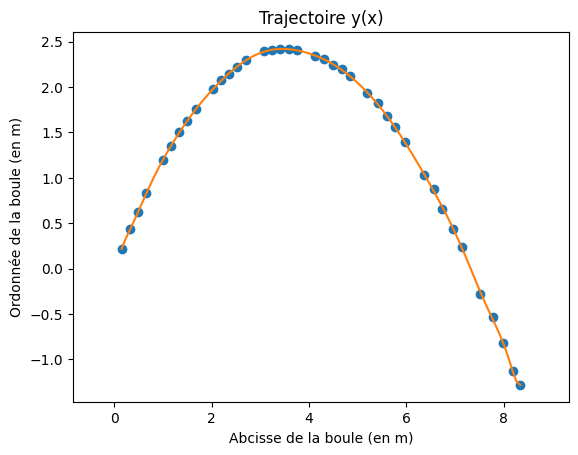

In [ ]:
#Cf.https://stackoverflow.com/questions/19165259/python-numpy-scipy-curve-fitting
DEGRE=17
print("Degré du polynôme interpolateur pour y(x):",DEGRE)
print("Tester d'autres méthodes ? Chebyshev, Hermite, Laguerre,Bézier...")

spatial=np.polyfit(x,y,DEGRE)#Trajectoire dans l'espace - y en fonction de x
P_yx=np.poly1d(spatial)

NB_POINTS=100
x_nv = np.linspace(np.min(x),np.max(x),NB_POINTS)
t_interp = np.linspace(np.min(t),np.max(t),NB_POINTS)
y_de_x = P_yx(x_nv)

plt.title("Trajectoire y(x)")
plt.xlabel("Abcisse de la boule (en m)")
plt.ylabel("Ordonnée de la boule (en m)")
plt.plot(x,y,'o', x_nv, y_de_x)

plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()



In [ ]:
h_0r=y[0]-y[-1]#Première hauteur moins la dernière
#(la dernière correspondant à l'altitude réelle 0, puisque la balle touche le sol -> à mettre dans la convention de pointage.)
h_0i=y_de_x[0]-y_de_x[-1]
fleche_reelle=max(y)+h_0r
fleche_calculee=max(y_de_x)+h_0i

print("Hauteur initiale réelle (calcul à vérifier):",h_0r,"m")
print("Hauteur initiale interpolée (calcul à vérifier):", h_0i,"m\n")

print("Hauteur maximale réelle (flèche):",fleche_reelle)
print("Flèche interpolée:",fleche_calculee)


Hauteur initiale réelle (calcul à vérifier): 1.5005600000000001 m
Hauteur initiale interpolée (calcul à vérifier): 1.5001152920867369 m

Hauteur maximale réelle (flèche): 3.91767
Flèche interpolée: 3.920568708492966


Degré du polynôme interpolateur pour x(t): 1


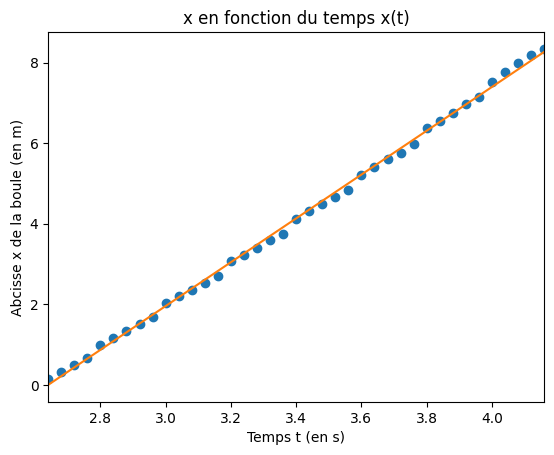

In [ ]:
#Pour une trajectoire parfaitement parabolique, un polynôme de degré 1 suffit (x=v0x*t+x0).
DEGRE_X=1
temporel_x = np.polyfit(t,x,DEGRE_X)#x en fonction de t
P_xt = np.poly1d(temporel_x)
eval_xt = P_xt(t_interp)
print("Degré du polynôme interpolateur pour x(t):",DEGRE_X)

plt.title("x en fonction du temps x(t)")
plt.xlabel("Temps t (en s)")
plt.ylabel("Abcisse x de la boule (en m)")

plt.plot(t,x,'o',t_interp,eval_xt)
plt.xlim([t_interp[0], t_interp[-1]])
plt.show()

Degré du polynôme interpolateur pour y(t): 2


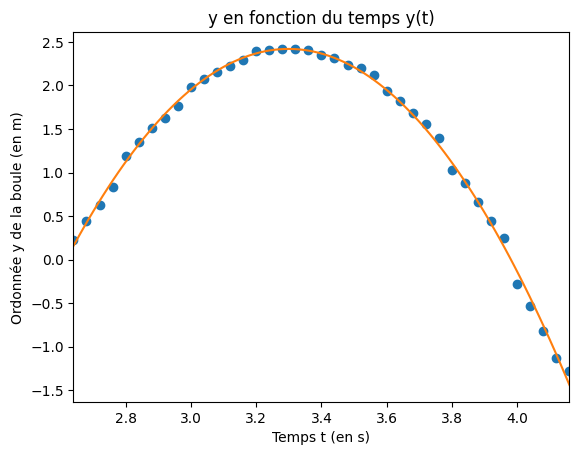

In [ ]:
#Pour une trajectoire parfaitement parabolique, un polynôme de degré 2 suffit.
DEGRE_Y=2
temporel_y=np.polyfit(t,y,DEGRE_Y)#y en fonction de t
P_yt=np.poly1d(temporel_y)
eval_yt=P_yt(t_interp)
print("Degré du polynôme interpolateur pour y(t):",DEGRE_Y)

plt.title("y en fonction du temps y(t)")
plt.xlabel("Temps t (en s)")
plt.ylabel("Ordonnée y de la boule (en m)")

plt.plot(t,y,'o',t_interp,eval_yt)
plt.xlim([t_interp[0], t_interp[-1]])
plt.show()

In [ ]:
#OM = np.sqrt(P_xt(t_interp)**2+P_yt(t_interp)**2)
#print(OM)

# On calcule désormais la vitesse instantanée à partir des composantes interpolées x(t) et y(t)
vx,vy=np.polyder(P_xt),np.polyder(P_yt)#Obtention des dérivées sous forme de polynômes
eval_vx,eval_vy=vx(t_interp),vy(t_interp) #Evaluation des polynomes en listes.
v=np.sqrt(eval_vx**2+eval_vy**2)#Obtention de la norme de la vitesse.
#On obtient l'angle en calculant l'arctangente de la dérivée en 0 (le vecteur dérivé est tangent à la trajectoire...).

angles = [abs(np.arctan2(eval_vy[i],eval_vx[i])) for i in range(NB_POINTS)]

angle_initial=angles[0]

print("Vitesse maximale atteinte:",np.max(v),"m/s")
print("Vitesse minimale atteinte:",np.min(v),"m/s")

print("Vitesse initiale (m/s):",v[0],"m/s")
print("Angle initial:",angle_initial ,"rad, soit", angle_initial*180/np.pi,"deg")
print("Angle minimal:",min(angles) ,"rad, soit", min(angles)*180/np.pi,"deg") #0 en théorie pour une trajectoire parabolique.



Vitesse maximale atteinte: 10.486670410914352 m/s
Vitesse minimale atteinte: 5.436956197300676 m/s
Vitesse initiale (m/s): 8.759520438503921 m/s
Angle initial: 0.9011738317791317 rad, soit 51.63345716857667 deg
Angle minimal: 0.0018247301958215607 rad, soit 0.10454933897065566 deg


In [ ]:
#Fonction à recoder pour plus de précision
def portee(g,y0,vx0,vy0):
  #x0 n'apparaît pas car on le suppose nul.
  if vx0==0:
    print("Tir vertical: portée nulle.")
    return 0

  g,y0,vx0,vy0=decimal.Decimal(g),decimal.Decimal(y0),decimal.Decimal(vx0),decimal.Decimal(vy0)
  #Les variables ci-dessous sont automatiquement définies comme étant de type Decimal.
  A=-g/(2*vx0**2)
  B=vy0/vx0
  C=y0
  delta=B**2-4*A*C
  if delta<0:
    print("Pas de solution réelle/physique.")
    return -1
  rac=delta.sqrt()
  K=2*A
  r1,r2=(-rac-B)/K,(rac-B)/K
  return max(r1,r2)#La première racine est censée être 0 si on tire depuis l'origine - on prend la plus grande.

#Fonction à recoder pour plus de précision
def portee_angle(v0,theta,g,y0):
  v0,theta,g,y0=decimal.Decimal(v0),decimal.Decimal(theta),decimal.Decimal(g),decimal.Decimal(y0)
  a=v0*decimal.cos(theta)
  b=v0*decimal.sin(theta)
  return (a/g)*(b+(b**2+2*g*y0).sqrt())

In [ ]:
"""
Calculs et comparaison des portées:
  1)Théorique, sans résistance de l'air par 2 méthodes équivalentes (mais créant des erreurs numériques différentes)
  2)Théorique, avec résistance de l'air
  3)Portée réelle obtenue.
"""

portee_reelle=max(x)-min(x)

print("Portée réelle:",portee_reelle,"m")

#p=portee(9.81,h_0i,eval_vx[0],eval_vy[0])

#q=portee_angle(v[0],angle_initial,9.81,h_0r)

print("Portée calculée (dans le vide), méthode 'cartésienne':",p)
print("Portée calculée (dans le vide), méthode 'polaire':",q)
print("Ecart:",q-portee_reelle)
#print("Moyenne des portées calculées (inutile):",(p+q)/2)
print("Conclusion: il y a probablement des erreurs numériques (arrondi,etc.) \nRevoir les méthodes de détermination des vitesses et des angles et opter pour les plus fidèles.")
print("A faire: réimplémenter les calculs avec la bibli 'decimal' pour plus de précision.")
#Voir également les histoires d'espacement des points etc.

print(mp.mp)

Portée réelle: 8.184109 m
Portée calculée (dans le vide), méthode 'cartésienne': 8.657082103742811527524838121
Portée calculée (dans le vide), méthode 'polaire': 8.657358352412448
Ecart: 0.4732493524124486
Conclusion: il y a probablement des erreurs numériques (arrondi,etc.) 
Revoir les méthodes de détermination des vitesses et des angles et opter pour les plus fidèles.
A faire: réimplémenter les calculs avec la bibli 'decimal' pour plus de précision.
Mpmath settings:
  mp.prec = 53                [default: 53]
  mp.dps = 15                 [default: 15]
  mp.trap_complex = False     [default: False]
